In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:


np.random.seed(42)
df = pd.DataFrame({
    'CustomerID': range(1, 201),
    'Annual_Spend': np.random.normal(5000, 1500, 200),
    'Visit_Frequency': np.random.normal(10, 2, 200),
    'Discount_Usage': np.random.normal(0.3, 0.1, 200),
    'Satisfaction_Score': np.random.normal(7, 1.5, 200)
})

print("\n✅ Simulated dataset preview:")
print(df.head())



✅ Simulated dataset preview:
   CustomerID  Annual_Spend  Visit_Frequency  Discount_Usage  \
0           1   5745.071230        10.715575        0.140557   
1           2   4792.603548        11.121569        0.240062   
2           3   5971.532807        12.166102        0.300524   
3           4   7284.544785        12.107604        0.304698   
4           5   4648.769938         7.244661        0.254993   

   Satisfaction_Score  
0            8.135483  
1            5.616752  
2            8.304409  
3            9.033457  
4            7.620152  


In [5]:
# 3️⃣ Basic EDA
print("\nDataset info:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          200 non-null    int64  
 1   Annual_Spend        200 non-null    float64
 2   Visit_Frequency     200 non-null    float64
 3   Discount_Usage      200 non-null    float64
 4   Satisfaction_Score  200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Summary statistics:
       CustomerID  Annual_Spend  Visit_Frequency  Discount_Usage  \
count  200.000000    200.000000       200.000000      200.000000   
mean   100.500000   4938.843552        10.171736        0.291434   
std     57.879185   1396.505873         1.974008        0.099404   
min      1.000000   1070.382344         3.517465        0.052836   
25%     50.750000   3942.308488         8.788325        0.220612   
50%    100.500000   4993.712174        10.157679      

In [6]:
# 4️⃣ Handle missing values (basic approach: fill with median)
df.fillna(df.median(numeric_only=True), inplace=True)


In [7]:
# 5️⃣ Feature selection: numeric features only for clustering
numeric_features = df.select_dtypes(include=[np.number])
print("\nNumeric features selected for clustering:")
print(numeric_features.columns.tolist())



Numeric features selected for clustering:
['CustomerID', 'Annual_Spend', 'Visit_Frequency', 'Discount_Usage', 'Satisfaction_Score']


In [8]:
# 6️⃣ Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

In [9]:
# 7️⃣ Determine optimal number of clusters with the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


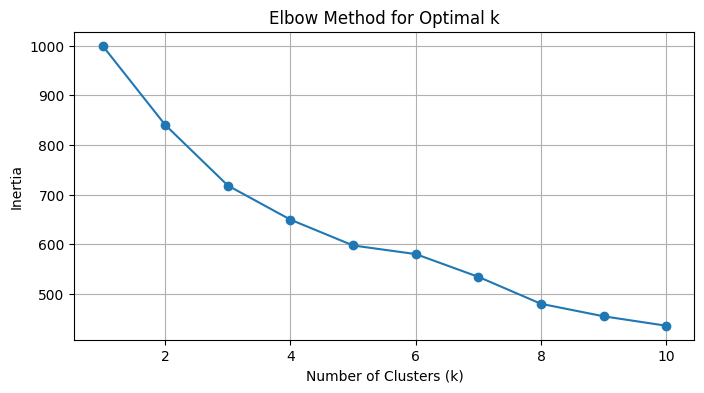

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [11]:
# 8️⃣ Apply KMeans with chosen number of clusters (e.g., k=3)
k = 3  # You can change this based on the elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


In [12]:
# 9️⃣ Visualize clusters using PCA for 2D projection
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


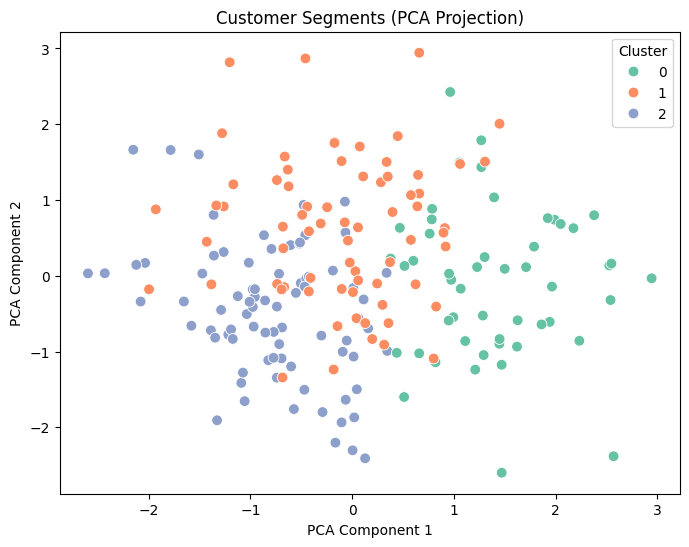

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [14]:
# 🔟 Analyze cluster profiles
cluster_profiles = df.groupby('Cluster')[numeric_features.columns].mean()
print("\nCluster Profiles (mean values):")
print(cluster_profiles)


Cluster Profiles (mean values):
         CustomerID  Annual_Spend  Visit_Frequency  Discount_Usage  \
Cluster                                                              
0         61.860000   3962.404142         8.667933        0.354571   
1        160.642857   5017.072369        10.283189        0.301882   
2         72.025000   5480.667969        11.014093        0.242832   

         Satisfaction_Score  
Cluster                      
0                  7.812270  
1                  7.407657  
2                  6.169256  


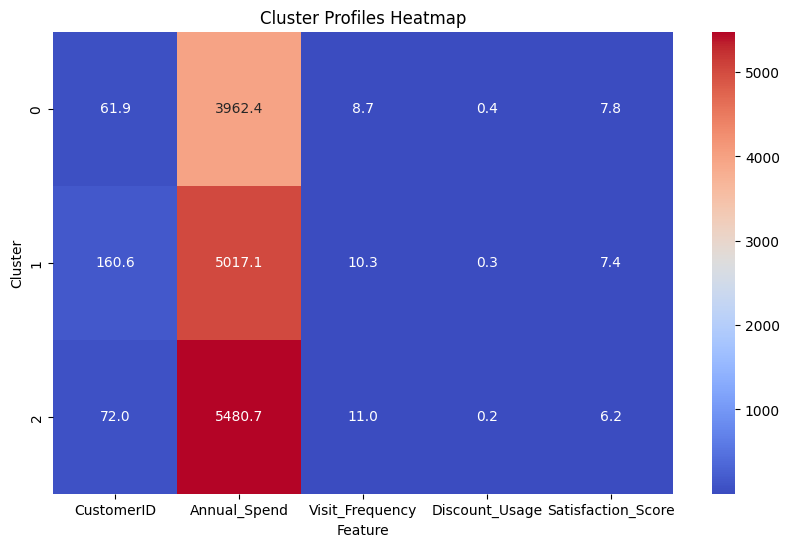

In [15]:
# 1️⃣1️⃣ Visualize cluster profiles
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profiles, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Cluster Profiles Heatmap')
plt.ylabel('Cluster')
plt.xlabel('Feature')
plt.show()


In [16]:
# 1️⃣2️⃣ Recommendations based on clusters
for cluster_num in cluster_profiles.index:
    print(f"\n🎯 Cluster {cluster_num} insights:")
    profile = cluster_profiles.loc[cluster_num]
    print(profile)
    # Example: create insights based on real business metrics
    print("Potential Strategy: Offer tailored promotions and loyalty programs.\n")


🎯 Cluster 0 insights:
CustomerID              61.860000
Annual_Spend          3962.404142
Visit_Frequency          8.667933
Discount_Usage           0.354571
Satisfaction_Score       7.812270
Name: 0, dtype: float64
Potential Strategy: Offer tailored promotions and loyalty programs.


🎯 Cluster 1 insights:
CustomerID             160.642857
Annual_Spend          5017.072369
Visit_Frequency         10.283189
Discount_Usage           0.301882
Satisfaction_Score       7.407657
Name: 1, dtype: float64
Potential Strategy: Offer tailored promotions and loyalty programs.


🎯 Cluster 2 insights:
CustomerID              72.025000
Annual_Spend          5480.667969
Visit_Frequency         11.014093
Discount_Usage           0.242832
Satisfaction_Score       6.169256
Name: 2, dtype: float64
Potential Strategy: Offer tailored promotions and loyalty programs.

